In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colormaps
import plotly.express as px

In [2]:
def catmull_rom_to_bezier(p0, p1, p2, p3):
    """
    Generate control points for a cubic Bezier curve.
    The Bezier curve will trace points between p1 and p2, given **external** control points p0 and p3.
    """
    b0 = p1
    b1 = p1 + (p2 - p0) / 6 
    b2 = p2 - (p3 - p1) / 6
    b3 = p2
    return b0, b1, b2, b3

def cubic_bezier_curve(t, P0, P1, P2, P3):
    """
    Generate a cubic Bezier curve that traces P0 and P3, running smoothly near control points P1 and P2.
    """
    B0 = (1 - t)**3
    B1 = 3 * t * (1 - t)**2
    B2 = 3 * t**2 * (1 - t)
    B3 = t**3
    return P0 * B0 + P1 * B1 + P2 * B2 + P3 * B3

def generate_bezier_points(P0, P1, P2, P3, num_points):
    t_values = np.linspace(0, 1, num_points)
    points = [cubic_bezier_curve(t, P0, P1, P2, P3) for t in t_values]
    return points

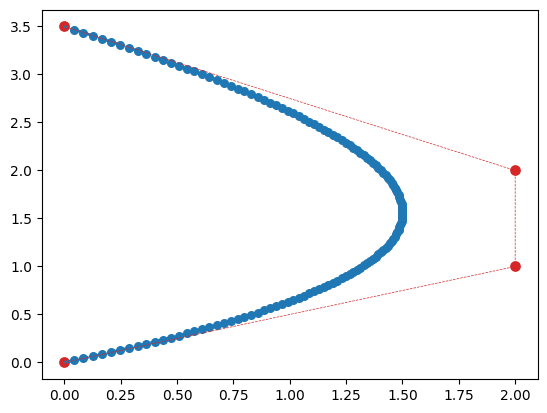

In [29]:
b0 = np.array([-1.5,0]) # start
b1 = np.array([-0.75,0]) # control-1
b2 = np.array([0.75,0]) # control-2
b3 = np.array([1.5,0]) # end

b = np.asarray([b0,b1,b2,b3])

num_points_per_segment = 140
points_on_curve = np.asarray(generate_bezier_points(*b, num_points_per_segment))
plt.plot(points_on_curve[:,0],points_on_curve[:,1],"--",linewidth=2,c="tab:blue")
plt.scatter(points_on_curve[:,0],points_on_curve[:,1],s=30,c="tab:blue")
plt.scatter(np.vstack((b0,b1,b2,b3))[:,0],np.vstack((b0,b1,b2,b3))[:,1],s=45,c="tab:red")
plt.plot(np.vstack((b0,b1,b2,b3))[:,0],np.vstack((b0,b1,b2,b3))[:,1],"--",linewidth=0.5,c="tab:red")

In [4]:
# check if all segments 
dists = np.asarray([np.linalg.norm(points_on_curve[i]-points_on_curve[i-1]) for i in range (1,num_points_per_segment)])
print((dists < 0.055).all()) # check if values are below a threshold
print(np.average(dists))

True
0.03847155043028532


In [4]:
5/3

1.6666666666666667

In [3]:
b0 = np.array([-1.5,0]) # start
b1 = np.array([-0.75,0]) # control-1
b2 = np.array([0.75,0]) # control-2
b3 = np.array([1.5,0]) # end

b = np.asarray([b0,b1,b2,b3])
num_points_per_segment = 140
p0 = np.asarray(generate_bezier_points(*b, num_points_per_segment))

b0 = np.array([1.5,1]) # start
b1 = np.array([0.75,1]) # control-1
b2 = np.array([-0.75,1]) # control-2
b3 = np.array([-1.5,1]) # end

b = np.asarray([b0,b1,b2,b3])
num_points_per_segment = 140
p1 = np.asarray(generate_bezier_points(*b, num_points_per_segment))

obstacles = [p0,p1]

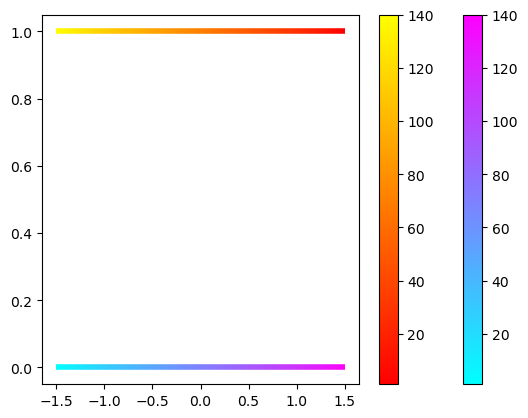

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection
import matplotlib

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)



fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
agents = colormaps['cool']
obs_colors = colormaps['autumn']



norm = matplotlib.colors.Normalize(vmin=1, vmax=obstacles[0].shape[0])
segments_1 = []
colors_1 = []
for i,p in enumerate(obstacles[0]):
  if i == 0:
    p_prev = p
    continue

  segments_1.append([p_prev,p])
  colors_1.append(agents(norm(i)))

  p_prev = p

lc_1 = LineCollection(segments_1, colors=colors_1, linewidth=4)
line_1 = axs.add_collection(lc_1)
fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=agents), ax=axs)

#######
norm_2 = matplotlib.colors.Normalize(vmin=1, vmax=obstacles[1].shape[0])
segments_2 = []
colors_2 = []
for i,p in enumerate(obstacles[1]):
  if i == 0:
    p_prev = p
    continue

  segments_2.append([p_prev,p])
  colors_2.append(obs_colors(norm(i)))

  p_prev = p

lc_2 = LineCollection(segments_2, colors=colors_2, linewidth=4)
line_2 = axs.add_collection(lc_2)
fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm_2, cmap=obs_colors), ax=axs)

axs.autoscale()



plt.show()

In [10]:
wistia = colormaps['Wistia']
# wistia(norm)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
obstacle_navigation_iters = 140
bezier_control_points = []
# for each obstacle, append an array like below # NOTE: these are just examples for now, need to work for better values
bezier_control_points.append(
    np.array([
        [0,0],
        [2,1],
        [2,2],
        [4,3.5]
    ])
)

bezier_control_points.append(
    np.array([
        [4,0],
        [2,1],
        [2,2],
        [0,3.5]
    ])
)

bezier_control_points.append(
    np.array([
        [0,0],
        [0,1],
        [0,2],
        [0,3.5]
    ])
)

obstacle_trajectories = [np.asarray(generate_bezier_points(*bezier_control_points[i], obstacle_navigation_iters)) for i in range(len(bezier_control_points))]


In [19]:
type(bezier_control_points[0])

list

In [17]:
generate_bezier_points(*bezier_control_points[0][0],obstacle_navigation_iters)

TypeError: generate_bezier_points() missing 3 required positional arguments: 'P2', 'P3', and 'num_points'